# Imports

In [ ]:
!pip install --upgrade scikit-learn
!pip install --upgrade keras
!pip install --upgrade scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 29.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import scikeras
import keras
from scikeras.wrappers import KerasRegressor
from keras import Sequential
from keras import layers

# Import data

In [ ]:
df1 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0BOFEN/Features%20data%20set.csv', delimiter=',')
df1.dataframeName = 'Features data set.csv'
df1

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In this dataset:
* Store - the store number
* Date - the week
* Temperature - average temperature in the region
* Fuel_Price - cost of fuel in the region
* MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
* CPI - the consumer price index
* Unemployment - the unemployment rate
* IsHoliday - whether the week is a special holiday week

In [ ]:
df2 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0BOFEN/sales%20data-set.csv', delimiter=',')
df2.dataframeName = 'Sales data set.csv'
df2

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In this dataset:
* Store - the store number
* Dept - the department number
* Date - the week
* Weekly_Sales - sales for the given department in the given store
* IsHoliday - whether the week is a special holiday week

In [ ]:
df3 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0BOFEN/stores%20data-set.csv', delimiter=',')
df3.dataframeName = 'Stores data set.csv'
df3

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


## Combine the Datasets

In [ ]:
df = df1.merge(df3, on = 'Store')
df = df2.merge(df, on = ['Store','Date', 'IsHoliday'])
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,26/10/2012,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,26/10/2012,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,26/10/2012,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,26/10/2012,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [ ]:
df=df.fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     421570 non-null  float64
 8   MarkDown2     421570 non-null  float64
 9   MarkDown3     421570 non-null  float64
 10  MarkDown4     421570 non-null  float64
 11  MarkDown5     421570 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


## Change the data types of store Type and Date

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Type'] = df['Type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  category      
 15  Size          421

## Since Stores and Departments have different catagories, it would be foolish to fit a neural network to all the records. Each department will have it's own variance.

In [ ]:
df.groupby(['Store', 'Dept', 'Date'])[['Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']].sum()

Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
Store Dept Date                                                           
1     1    2010-02-05      24924.50          0        42.31       2.572   
           2010-02-12      46039.49          1        38.51       2.548   
           2010-02-19      41595.55          0        39.93       2.514   
           2010-02-26      19403.54          0        46.63       2.561   
           2010-03-05      21827.90          0        46.50       2.625   
...                             ...        ...          ...         ...   
45    98   2012-09-28        508.37          0        64.88       3.997   
           2012-10-05        628.10          0        64.89       3.985   
           2012-10-12       1061.02          0        54.47       4.000   
           2012-10-19        760.01          0        56.47       3.969   
           2012-10-26       1076.80          0        58.85       3.882   

                       MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
Store Dept Date                                                                
1     1    2010-02-05       0.00       0.00       0.00       0.00       0.00   
           2010-02-12       0.00       0.00       0.00       0.00       0.00   
           2010-02-19       0.00       0.00       0.00       0.00       0.00   
           2010-02-26       0.00       0.00       0.00       0.00       0.00   
           2010-03-05       0.00       0.00       0.00       0.00       0.00   
...                          ...        ...        ...        ...        ...   
45    98   2012-09-28    4556.61      20.64       1.50    1601.01    3288.25   
           2012-10-05    5046.74       0.00      18.82    2253.43    2340.01   
           2012-10-12    1956.28       0.00       7.89     599.32    3990.54   
           2012-10-19    2004.02       0.00       3.18     437.73    1537.49   
           2012-10-26    4018.91      58.08     100.00     211.94     858.33   

                              CPI  Unemployment    Size  
Store Dept Date                                          
1     1    2010-02-05  211.096358         8.106  151315  
           2010-02-12  211.242170         8.106  151315  
           2010-02-19  211.289143         8.106  151315  
           2010-02-26  211.319643         8.106  151315  
           2010-03-05  211.350143         8.106  151315  
...                           ...           ...     ...  
45    98   2012-09-28  192.013558         8.684  118221  
           2012-10-05  192.170412         8.667  118221  
           2012-10-12  192.327265         8.667  118221  
           2012-10-19  192.330854         8.667  118221  
           2012-10-26  192.308899         8.667  118221  

[421570 rows x 12 columns]

In [ ]:
df[['Store', 'Dept']].value_counts()

Store  Dept
1      1       143
40     55      143
       59      143
24     49      143
       50      143
              ... 
21     50        1
42     34        1
36     36        1
25     96        1
23     99        1
Name: count, Length: 3331, dtype: int64

Most Departments have 143 rows, lets analyze one of them:

In [ ]:
St = 24
Dt = 50

In [ ]:
df_d = df[(df['Store']==St) & (df['Dept']==Dt)]
df_d

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
226912,24,50,2010-02-05,2030.0,False,22.43,2.954,0.00,0.00,0.00,0.00,0.00,131.527903,8.326,A,203819
226985,24,50,2010-02-12,1535.0,True,25.94,2.940,0.00,0.00,0.00,0.00,0.00,131.586613,8.326,A,203819
227059,24,50,2010-02-19,1570.0,False,31.05,2.909,0.00,0.00,0.00,0.00,0.00,131.637000,8.326,A,203819
227130,24,50,2010-02-26,1350.0,False,33.98,2.910,0.00,0.00,0.00,0.00,0.00,131.686000,8.326,A,203819
227201,24,50,2010-03-05,2700.0,False,36.73,2.919,0.00,0.00,0.00,0.00,0.00,131.735000,8.326,A,203819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236783,24,50,2012-09-28,1035.0,False,58.86,4.158,11941.13,15.28,21.76,984.11,7013.13,138.739500,8.953,A,203819
236854,24,50,2012-10-05,1005.0,False,60.35,4.151,10349.00,0.00,16.05,5824.86,2770.76,138.825600,8.693,A,203819
236926,24,50,2012-10-12,1196.5,False,51.64,4.186,5138.51,0.00,141.88,407.81,3284.69,138.911700,8.693,A,203819
236999,24,50,2012-10-19,1151.0,False,52.59,4.153,3446.70,0.00,101.00,111.46,5963.01,138.833613,8.693,A,203819


The dataframe we are examining is for store number 24 department 50 only

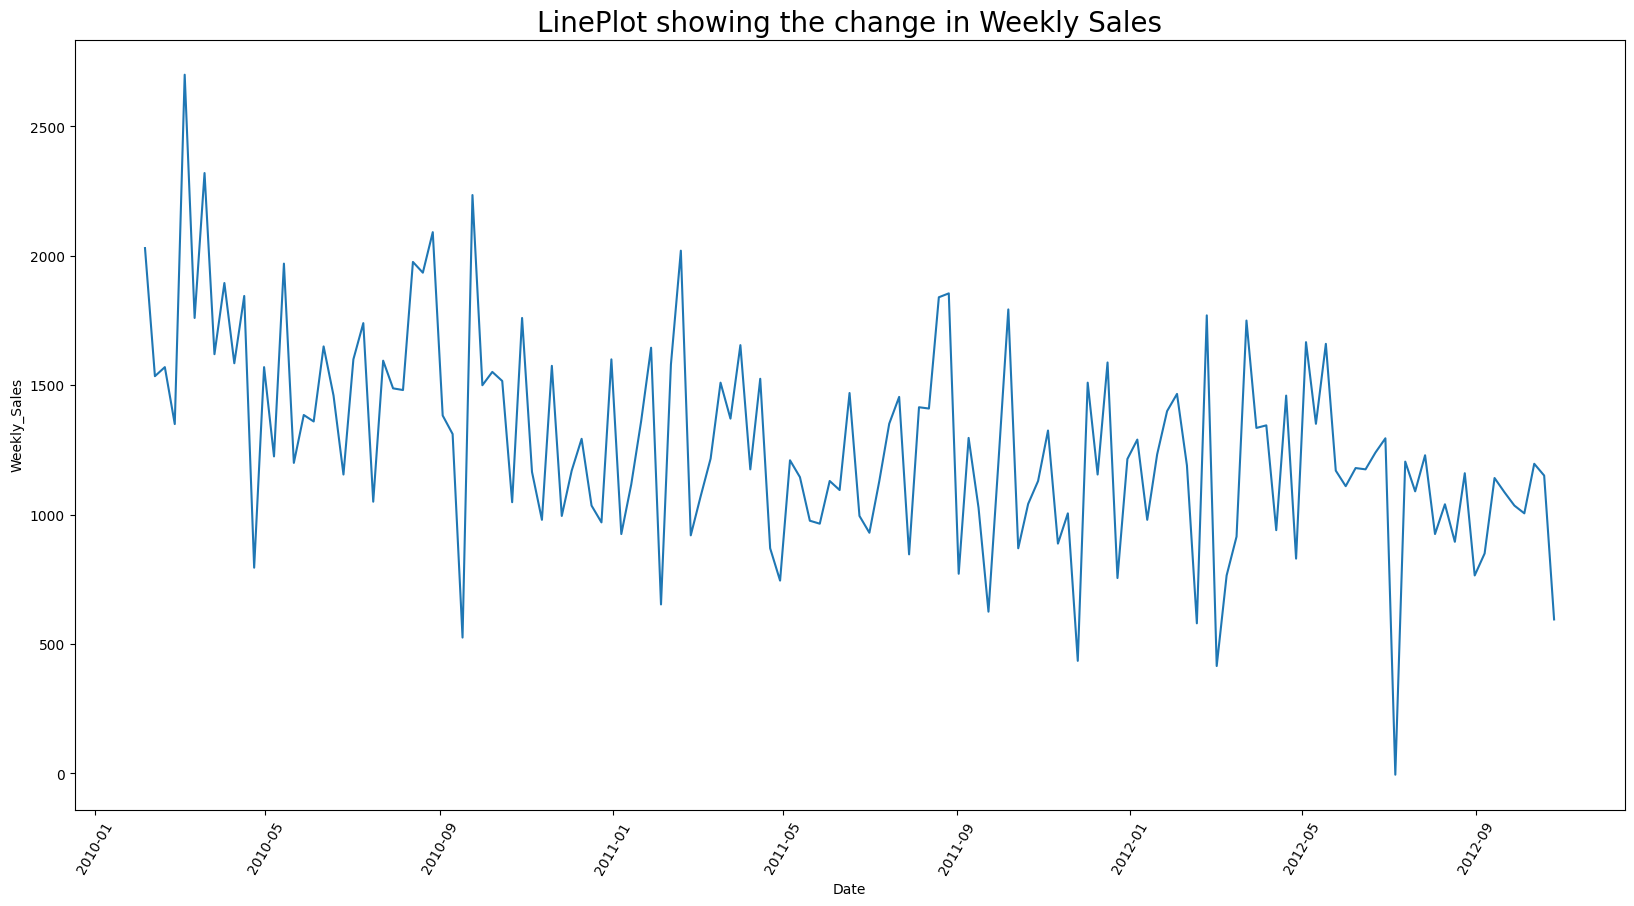

In [ ]:
plt.figure
_ = plt.subplots(figsize = (20,10))
_ = plt.xticks(rotation = 60)
_ = sns.lineplot(data = df_d, x = 'Date',y = 'Weekly_Sales', )
_ = plt.title('LinePlot showing the change in Weekly Sales', fontsize=20)
plt.show()

Now, let's see how these sales change during holidays:

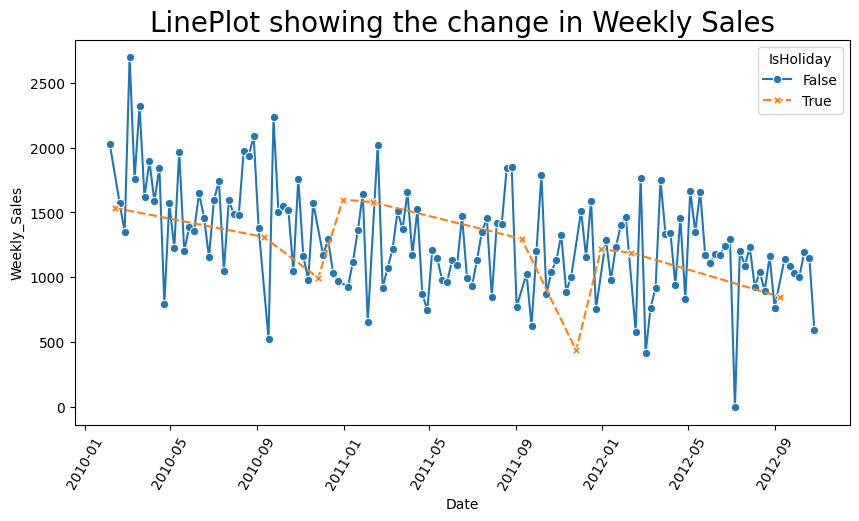

In [ ]:
plt.figure
_ = plt.subplots(figsize = (10,5))
_ = plt.xticks(rotation = 60)
_ = sns.lineplot(data = df_d, x = 'Date',y = 'Weekly_Sales', hue = 'IsHoliday',style = 'IsHoliday', markers = True, errorbar=('ci', 68))
_ = plt.title('LinePlot showing the change in Weekly Sales', fontsize=20)
plt.show()

From the plot, we can conclude that there is no increase in sales on holidays

For a sales forecast, lets create aa separate time series that only contains weekly sales data:

In [ ]:
ts = df_d[['Date', 'Weekly_Sales']]
ts = ts.set_index('Date')
ts = ts['Weekly_Sales']
ts

,Weekly_Sales
Date,
2010-02-05,2030.0
2010-02-12,1535.0
2010-02-19,1570.0
2010-02-26,1350.0
2010-03-05,2700.0
...,...
2012-09-28,1035.0
2012-10-05,1005.0
2012-10-12,1196.5


In order to make a forecast of time series, we can only make an assumption that the **data for today** depends on the **values of previous weeks**. To check for dependencies, we need to perform a **correlation analysis** between them. This requires:

1. duplicating the times series of data and moving it vertically down for a certain number of days (lag). In other words, We’ll take that list and make a copy of it, but shift the sales down by a certain number of days. This lets us compare sales from today with sales from, say, a week ago.
2. deleting the missing data at the beginning and at the end (this missing data is formed by the virtical shift)
3. calculating the correlation coefficient between the obtained series. After shifting, we check how closely sales from previous days or weeks match up with sales today. If there’s a strong match, that means sales from the past really do affect today’s sales.

0     1.000000
1     0.130103
2     0.263880
3     0.136014
4     0.311210
5     0.126184
6     0.245963
7     0.088694
8     0.253053
9     0.071838
10    0.154257
Name: Correlation Coeff, dtype: float64
0     1.000000
1     0.131019
2     0.254831
3     0.086411
4     0.254782
5     0.043069
6     0.131390
7    -0.013168
8     0.127694
9    -0.028223
10    0.000674
Name: Partial Correlation Coeff, dtype: float64


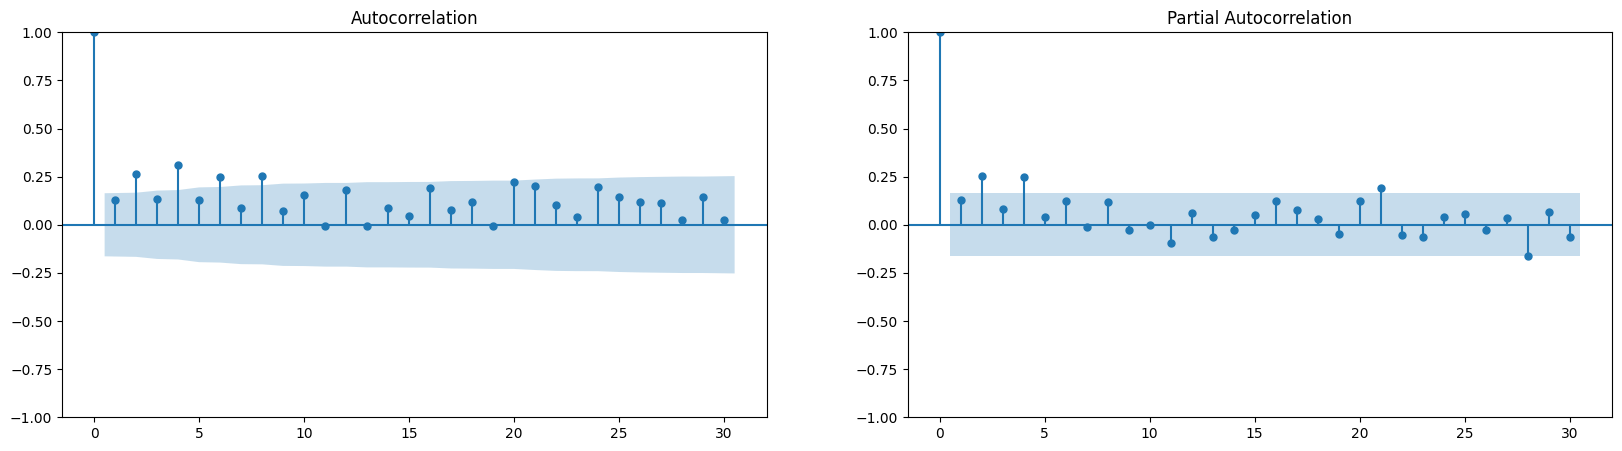

In [ ]:
print(pd.Series(acf(ts,nlags=10), name = "Correlation Coeff")) #  The acf() function looks at how today’s sales are related to the sales from the last 10 days or weeks (nlags=10)
print(pd.Series(pacf(ts,nlags=10), name = "Partial Correlation Coeff")) # checks the connection between today’s sales and past sales while ignoring the effect of other days in between

fig, axes = plt.subplots(1,2, figsize=(20,5))
_ = plot_acf(ts, lags=30, ax=axes[0])
_ = plot_pacf(ts, lags=30, ax=axes[1])

From this plot, we can conclude that in order to build a forecast, we would need to use data from the previous 4 weeks as it has the highest correlation

# First models:

## Dataset Creation

Any forecast Model can be shown as a blackbox of input and output. The target should be the data of the original time series, and the input values are given for the previous weeks.

To automate this process, I'll create a general function for time series transformation into a dataset structure:

In [ ]:
def series_to_supervised(in_data, tar_data, n_in=1, dropnan=True, target_dep=False):

    n_vars = in_data.shape[1]
    cols, names = list(), list()

    if target_dep:
        i_start = 1
    else:
        i_start = 0
    for i in range(i_start, n_in + 1):
        cols.append(in_data.shift(i))
        names += [('%s(t-%d)' % (in_data.columns[j], i)) for j in range(n_vars)]

    if target_dep:
        for i in range(n_in, -1, -1):
            cols.append(tar_data.shift(i))
            names += [('%s(t-%d)' % (tar_data.name, i))]
    else:
        # put it all together
        cols.append(tar_data)
        names.append(tar_data.name)
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

In [ ]:
dataset = series_to_supervised(pd.DataFrame(ts), ts, 4)
dataset

,Weekly_Sales(t-0),Weekly_Sales(t-1),Weekly_Sales(t-2),Weekly_Sales(t-3),Weekly_Sales(t-4),Weekly_Sales
Date,,,,,,
2010-03-05,2700.0,1350.0,1570.0,1535.0,2030.0,2700.0
2010-03-12,1760.0,2700.0,1350.0,1570.0,1535.0,1760.0
2010-03-19,2320.0,1760.0,2700.0,1350.0,1570.0,2320.0
2010-03-26,1620.0,2320.0,1760.0,2700.0,1350.0,1620.0
2010-04-02,1895.0,1620.0,2320.0,1760.0,2700.0,1895.0
...,...,...,...,...,...,...
2012-09-28,1035.0,1086.5,1141.5,850.0,765.0,1035.0
2012-10-05,1005.0,1035.0,1086.5,1141.5,850.0,1005.0
2012-10-12,1196.5,1005.0,1035.0,1086.5,1141.5,1196.5


Above, you can see the first and last columns contain the same target data. Now we will create input(**X**), and output(**Y**) dataset for forecasting models

In [ ]:
col = dataset.columns
X, Y = dataset[col[1:-1]], dataset[col[-1]]
print("Input: ", X.columns)
print("Target:", Y.name)

Input:  Index(['Weekly_Sales(t-1)', 'Weekly_Sales(t-2)', 'Weekly_Sales(t-3)',
       'Weekly_Sales(t-4)'],
      dtype='object')
Target: Weekly_Sales


## Data Normalization

After that, I"ll normalize all the data. In order to do this, the **sklearn.preprocessing.MinMaxScaler** module should be used.
It allows easy normalize **fit_transform()** and convert back all data: **fit_transform()**

In [ ]:
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_x = scaler_x.fit_transform(X)
scaled_y = scaler_y.fit_transform(Y.values.reshape(-1, 1))

After that I will form a training and a test DataSet using **sklearn.model_selection.train_test_split()** in the ratio of 70/30. Without shuffling. It means that test samples are located at the end of **X** and **Y** DataSets.

As a result I will have:

Input normalized DataSets: **X_train, X_test**

Target normalized DataSets: **y_train, y_test**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.3, shuffle=False)

In [ ]:
res_train = scaler_y.inverse_transform(y_train).flatten()
res_test = scaler_y.inverse_transform(y_test).flatten()

Target real scale DataSets: **res_train, res_test**.


I"ll test three types of models:
1. Linear Regression
2. Multilayer Neural Network with Backpropagation
3. Long Short-Term Memory Neural Network.

## Linear Regression

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred_test_ln = regressor.predict(x_test)
y_pred_test_ln = scaler_y.inverse_transform(y_pred_test_ln).flatten()

In [ ]:
print("Correlation train", regressor.score(x_train, y_train))
print("Correlation test", regressor.score(x_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_ln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_ln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ln)))

Correlation train 0.12826507500598938
Correlation test -0.09385443205786403
Mean Absolute Error: 1218.9282051415503
Mean Squared Error: 1496069.2012173075
Root Mean Squared Error: 1223.139076809055


Very bad results, time to test a non-linear model

## Back Propagation Neural Network

In [ ]:
from keras import Sequential
from keras import layers
#from keras import EarlyStopping
import keras
print(keras.__version__)

3.5.0


In [ ]:
def BP_model(X): # Function to create a back propagation model
    # create model
    model = keras.Sequential()
    model.add(keras.layers.Dense(100, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
epochs = 1000
batch_size=int(y_train.shape[0]*.1)
#estimator = KerasRegressor(build_fn=BP_model, X=x_train, epochs=epochs, batch_size=batch_size, verbose=1)
estimator = BP_model(x_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', patience=10, verbose=1,  restore_best_weights=True)
history = estimator.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[es]) # Fitting model

Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - loss: 0.2307 - val_loss: 0.1012
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.1285 - val_loss: 0.0186
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0328 - val_loss: 0.0326
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0304 - val_loss: 0.0167
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0253 - val_loss: 0.0164
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0214 - val_loss: 0.0189
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0211 - val_loss: 0.0170
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0226 - val_loss: 0.0167
Epoch 9/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0289 - val_loss: 0.0176
Epoch 10/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0221 - val_loss: 0.0172
Epoch 11/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0212 - val_loss: 0.0180
Epoch 12/1000
11/11 ━━━━━━━━━━━━━━━━━━━

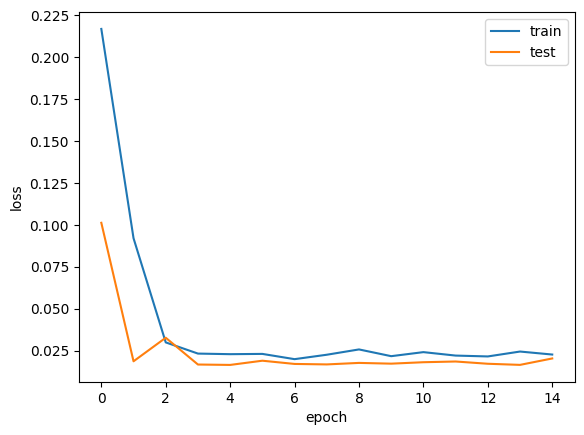

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

From the above plot, we can observe that there is no overfitting taking place

Now, let's calculate the forecast and perform inverse normalization to real scale:

In [ ]:
res_tr=estimator.predict(x_train)
res_ts=estimator.predict(x_test)
res_train_ANN=scaler_y.inverse_transform(res_tr.reshape(-1, 1)).flatten()
res_test_ANN=scaler_y.inverse_transform(res_ts.reshape(-1, 1)).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


Now, we'll compare the accuracy from the Linear Regression model to the ANN

In [ ]:
print("Correlation train", np.corrcoef(res_train, res_train_ANN)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_ANN)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_ANN))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_ANN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_ANN)))

Correlation train 0.3448233123661322
Correlation train 0.08022165377794438
Mean Absolute Error: 1100.084414195519
Mean Squared Error: 1218027.9259504862
Root Mean Squared Error: 1103.6430246916284


As seen above, the result correlation on the test set is a little better, but still not acceptable. We will now use a recurrect neural network

## Long Short-Term Memory = LTSM

Unlike standard feedforward neural networks, an **LSTM** has feedback connections. It can not only process single data points, but also entire sequences of data (such as speech, video or time series).

In the case of a time series, the neural network has one input and one output. However, the vector of time series values for the previous moments of time is fed to the input.

Therefore, we should transform the input dataset into a 3D shape

In [ ]:
train_x_LSTM = x_train.reshape((x_train.shape[0], 1, 4))
test_x_LSTM = x_test.reshape((x_test.shape[0], 1, 4))

Let's create an LSTM Neural Network that consists of one **LSTM** layer and one BP layer like in the previous case.
As you can see, in this case our NN will consist of 100 LSTM and 100 BP neurons.

In [ ]:
batch_size=int(y_train.shape[0]*.1)
model = Sequential()
model.add(keras.layers.LSTM(100, input_shape=(train_x_LSTM.shape[1], train_x_LSTM.shape[2])))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(100, kernel_initializer='normal', activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(y_train.shape[1])) #activation='sigmoid'
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


All subsequent steps of learning and predicting are similar to the previous neural network.

In [ ]:
history = model.fit(train_x_LSTM, y_train, epochs=epochs, batch_size=batch_size, validation_data=(test_x_LSTM, y_test), verbose=1, shuffle=False, callbacks=[es])

Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 366ms/step - loss: 0.2813 - val_loss: 0.0712
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1107 - val_loss: 0.0170
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0320 - val_loss: 0.0268
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0252 - val_loss: 0.0169
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0269 - val_loss: 0.0166
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0288 - val_loss: 0.0183
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0276 - val_loss: 0.0173
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0229 - val_loss: 0.0171
Epoch 9/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0261 - val_loss: 0.0176
Epoch 10/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0241 - val_loss: 0.0175
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 1.


Now, let's plot the dynamic of loss and val_loss

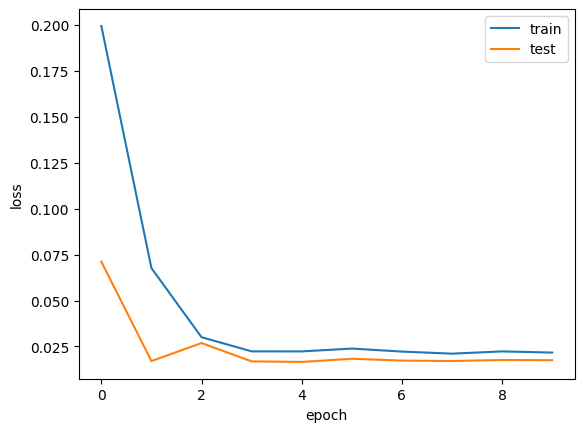

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

Now, Calculate the forecast

In [ ]:
res_tr_LSTM = model.predict(train_x_LSTM)
res_ts_LSTM = model.predict(test_x_LSTM)
res_train_LSTM=scaler_y.inverse_transform(res_tr_LSTM).flatten()
res_test_LSTM=scaler_y.inverse_transform(res_ts_LSTM).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [ ]:
print("Correlation train", np.corrcoef(res_train, res_train_LSTM)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_LSTM)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_LSTM))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_LSTM))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_LSTM)))

Correlation train 0.3193279131102315
Correlation train 0.023369164007873977
Mean Absolute Error: 474.0922949967654
Mean Squared Error: 226079.50947643394
Root Mean Squared Error: 475.47819032678456


Now, let's visualize the three results:

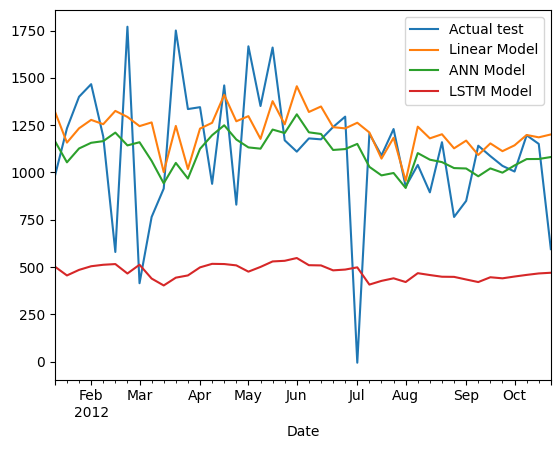

In [ ]:
res_pred_test_ln = pd.Series(y_pred_test_ln, name = 'Predicted test Linear Model')
res_pred_test_ANN = pd.Series(res_test_ANN, name = 'Predicted test ANN')
res_pred_test_LSTM = pd.Series(res_test_LSTM, name = 'Predicted test LSTM')

df_2 = pd.DataFrame({'Actual test': res_test, 'Linear Model': res_pred_test_ln, 'ANN Model': res_pred_test_ANN,  'LSTM Model': res_pred_test_LSTM,})
df_2.index = dataset.index[len(dataset)-len(res_test):]
df_2.plot()
plt.show()

As we can see, non of the models can predict the large peaks and troughs, however, the positions of the peaks coincide eith all the models. That means that this approach allows you to make adequite models. The accuracy of the forecast depands on additional factors which we will try to consider next

# Now, Let's model the effects of markdowns on Holiday weeks:

## Dataset Creation:

This will still only be for the specified store and department

In [ ]:
df_d = df_d.set_index('Date')
df_d

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,24,50,2030.0,False,22.43,2.954,0.00,0.00,0.00,0.00,0.00,131.527903,8.326,A,203819
2010-02-12,24,50,1535.0,True,25.94,2.940,0.00,0.00,0.00,0.00,0.00,131.586613,8.326,A,203819
2010-02-19,24,50,1570.0,False,31.05,2.909,0.00,0.00,0.00,0.00,0.00,131.637000,8.326,A,203819
2010-02-26,24,50,1350.0,False,33.98,2.910,0.00,0.00,0.00,0.00,0.00,131.686000,8.326,A,203819
2010-03-05,24,50,2700.0,False,36.73,2.919,0.00,0.00,0.00,0.00,0.00,131.735000,8.326,A,203819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,24,50,1035.0,False,58.86,4.158,11941.13,15.28,21.76,984.11,7013.13,138.739500,8.953,A,203819
2012-10-05,24,50,1005.0,False,60.35,4.151,10349.00,0.00,16.05,5824.86,2770.76,138.825600,8.693,A,203819
2012-10-12,24,50,1196.5,False,51.64,4.186,5138.51,0.00,141.88,407.81,3284.69,138.911700,8.693,A,203819


In [ ]:
df_d.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

Let's remove all the columns/fields that don't affect weekly sales

In [ ]:
df_d = df_d[['Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment']]
df_d

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Date,,,,,,,,,,,
2010-02-05,2030.0,False,22.43,2.954,0.00,0.00,0.00,0.00,0.00,131.527903,8.326
2010-02-12,1535.0,True,25.94,2.940,0.00,0.00,0.00,0.00,0.00,131.586613,8.326
2010-02-19,1570.0,False,31.05,2.909,0.00,0.00,0.00,0.00,0.00,131.637000,8.326
2010-02-26,1350.0,False,33.98,2.910,0.00,0.00,0.00,0.00,0.00,131.686000,8.326
2010-03-05,2700.0,False,36.73,2.919,0.00,0.00,0.00,0.00,0.00,131.735000,8.326
...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1035.0,False,58.86,4.158,11941.13,15.28,21.76,984.11,7013.13,138.739500,8.953
2012-10-05,1005.0,False,60.35,4.151,10349.00,0.00,16.05,5824.86,2770.76,138.825600,8.693
2012-10-12,1196.5,False,51.64,4.186,5138.51,0.00,141.88,407.81,3284.69,138.911700,8.693


Let's generate a heatmap to see the correlation between these fields:

In [ ]:
def my_headmap(corr):
    '''
    Input:
    corr: correlation matrix in DataFrame
    '''
    # Generate a mask for the upper triangle because it contains duplicate information
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap='RdYlGn', vmin=-1., vmax=1., annot=True, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

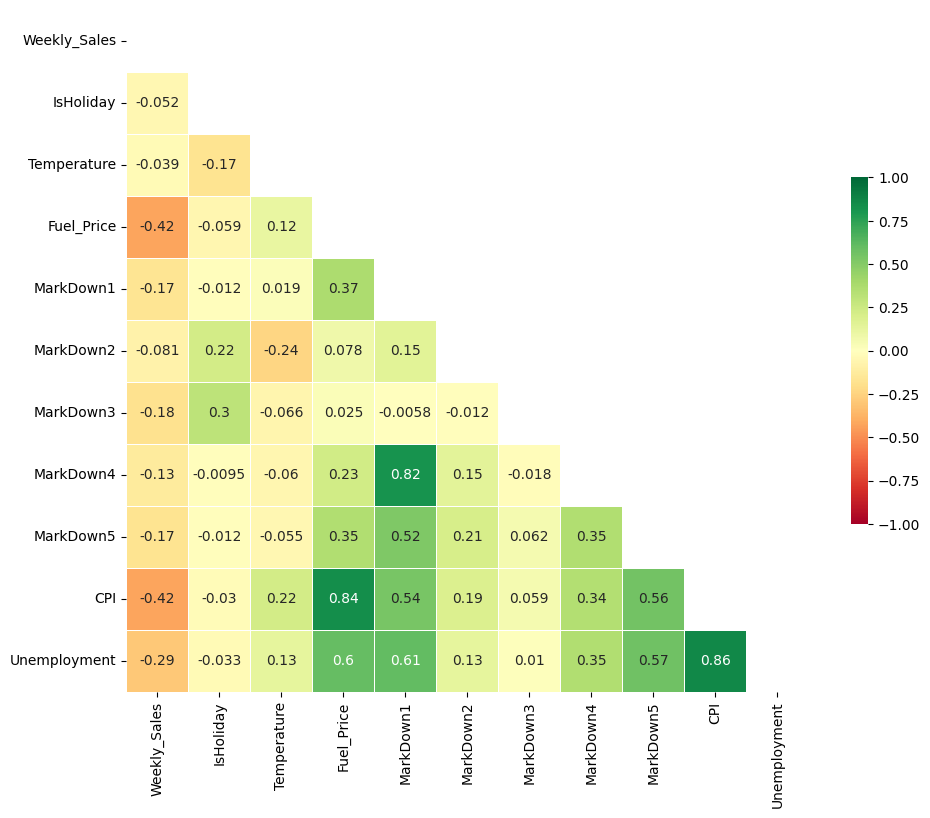

In [ ]:
my_headmap(df_d.corr())

As you can see, there are no fields/columns that directly impact Weekly sales

Let's now create a dataset by merging our 4 weeks sales data to this dataset

In [ ]:
df_hp = df_d.join(dataset[dataset.columns[1:-1]])
df_hp = df_hp.dropna()
df_hp

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales(t-1),Weekly_Sales(t-2),Weekly_Sales(t-3),Weekly_Sales(t-4)
Date,,,,,,,,,,,,,,,
2010-03-05,2700.0,False,36.73,2.919,0.00,0.00,0.00,0.00,0.00,131.735000,8.326,1350.0,1570.0,1535.0,2030.0
2010-03-12,1760.0,False,42.31,2.938,0.00,0.00,0.00,0.00,0.00,131.784000,8.326,2700.0,1350.0,1570.0,1535.0
2010-03-19,2320.0,False,46.09,2.960,0.00,0.00,0.00,0.00,0.00,131.824290,8.326,1760.0,2700.0,1350.0,1570.0
2010-03-26,1620.0,False,48.87,2.963,0.00,0.00,0.00,0.00,0.00,131.863129,8.326,2320.0,1760.0,2700.0,1350.0
2010-04-02,1895.0,False,45.22,2.957,0.00,0.00,0.00,0.00,0.00,131.901968,8.211,1620.0,2320.0,1760.0,2700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1035.0,False,58.86,4.158,11941.13,15.28,21.76,984.11,7013.13,138.739500,8.953,1086.5,1141.5,850.0,765.0
2012-10-05,1005.0,False,60.35,4.151,10349.00,0.00,16.05,5824.86,2770.76,138.825600,8.693,1035.0,1086.5,1141.5,850.0
2012-10-12,1196.5,False,51.64,4.186,5138.51,0.00,141.88,407.81,3284.69,138.911700,8.693,1005.0,1035.0,1086.5,1141.5


Let's creaate the inputs and target fields

In [ ]:
col = df_hp.columns
X, Y = df_hp[col[1:]], df_hp[col[0]]
print("Input: ", X.columns)
print("Target:", Y.name)

Input:  Index(['IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'Weekly_Sales(t-1)', 'Weekly_Sales(t-2)', 'Weekly_Sales(t-3)',
       'Weekly_Sales(t-4)'],
      dtype='object')
Target: Weekly_Sales


## Data Normalization

Now, normalize the fields:

In [ ]:
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_x = scaler_x.fit_transform(X)
scaled_y = scaler_y.fit_transform(Y.values.reshape(-1, 1))

Split into test and training sets:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.3, shuffle=False)

We make inverse transform to get the training and test sets in real scale.

In [ ]:
res_train = scaler_y.inverse_transform(y_train).flatten()
res_test = scaler_y.inverse_transform(y_test).flatten()

## Linear Model:

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred_test_ln = regressor.predict(x_test)
y_pred_test_ln = scaler_y.inverse_transform(y_pred_test_ln).flatten()

In [ ]:
print("Correlation train", regressor.score(x_train, y_train))
print("Correlation test", regressor.score(x_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_ln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_ln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ln)))

Correlation train 0.26288332778616996
Correlation test -1.447132031447754
Mean Absolute Error: 1334.5018593626776
Mean Squared Error: 1883506.5582750465
Root Mean Squared Error: 1372.4090346085043


Still, bad results

## Back Propagation NN

In [ ]:
def BP_model(X): # Function to create a back propagation model
    # create model
    model = keras.Sequential()
    model.add(keras.layers.Dense(100, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
epochs = 1000
batch_size=int(y_train.shape[0]*.1)
estimator = KerasRegressor(build_fn=BP_model, X=x_train, epochs=epochs, batch_size=batch_size, verbose=0)

In [ ]:
epochs = 1000
batch_size=int(y_train.shape[0]*.1)
#estimator = KerasRegressor(build_fn=BP_model, X=x_train, epochs=epochs, batch_size=batch_size, verbose=1)
estimator = BP_model(x_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', patience=10, verbose=1,  restore_best_weights=True)
history = estimator.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[es]) # Fitting model

Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2474 - val_loss: 0.0413
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0709 - val_loss: 0.0903
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0366 - val_loss: 0.0387
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0324 - val_loss: 0.0233
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0242 - val_loss: 0.0293
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0259 - val_loss: 0.0217
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0221 - val_loss: 0.0201
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0223 - val_loss: 0.0202
Epoch 9/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0292 - val_loss: 0.0207
Epoch 10/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225 - val_loss: 0.0187
Epoch 11/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0229 - val_loss: 0.0211
Epoch 12/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

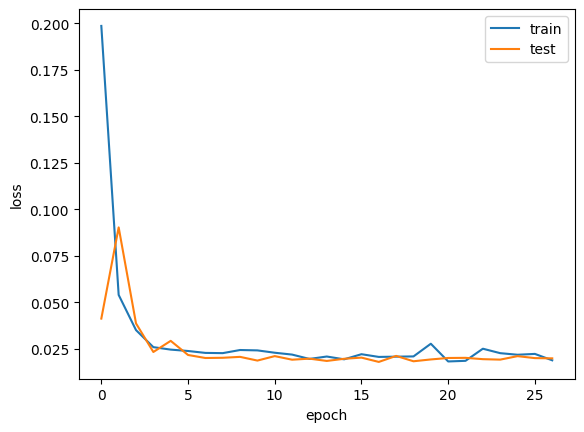

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

NN fits well aand no overfitting is observed

Now, let's calculate the forecast and inverse the mormalization to real scale

In [ ]:
res_tr=estimator.predict(x_train)
res_ts=estimator.predict(x_test)
res_train_ANN=scaler_y.inverse_transform(res_tr.reshape(-1, 1)).flatten()
res_test_ANN=scaler_y.inverse_transform(res_ts.reshape(-1, 1)).flatten()

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
print("Correlation train", np.corrcoef(res_train, res_train_ANN)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_ANN)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_ANN))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_ANN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_ANN)))

Correlation train 0.4557496406274001
Correlation train 0.06379047403905502
Mean Absolute Error: 1199.868114321077
Mean Squared Error: 1450119.3785040237
Root Mean Squared Error: 1204.2090260847672


As you can see, the forecast results of the test data set are much better than ones of the previous models. Let's visualize these 2 results:

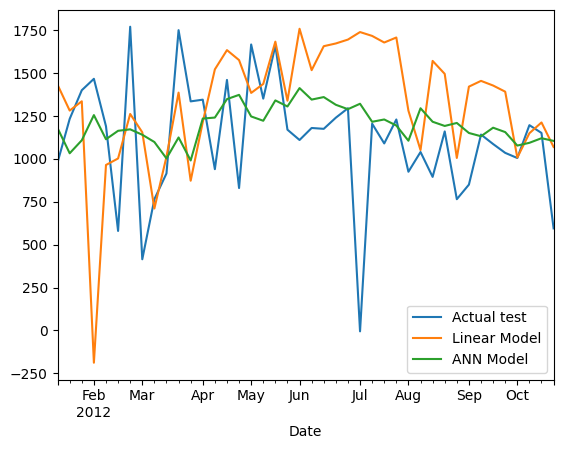

In [ ]:
res_pred_test_ln = pd.Series(y_pred_test_ln, name = 'Predicted test Linear Model')
res_pred_test_ANN = pd.Series(res_test_ANN, name = 'Predicted test ANN')

df_2 = pd.DataFrame({'Actual test': res_test, 'Linear Model': res_pred_test_ln, 'ANN Model': res_pred_test_ANN})
df_2.index = df_d.index[len(df_d)-len(res_test):]
df_2.plot()
plt.show()

As you can see from the plot, an ANN shows better results.

Let's calculate the sensitivity of week sales for other factors.

# Sensitivity Analysis

We can add a regressor model as an input parameter. This will allow us to use this function for any types of regressors.

In [ ]:
def my_sens(regressor, x, c, p):
    '''
    Input:
    x: DataFrame of input Linear Regression
    y: Series of output Linear Regression
    p: Percentage of price change
    Return:
    Sensitivity of target
    '''
    X = x[-1:].copy()
    y_pred = regressor.predict(X)
    X[0][c] = X[0][c]*(1+p)
    y_pred_delta = regressor.predict(X)
    return ((y_pred_delta - y_pred) / y_pred)[0]

Let's calculate the sensitivity of weekly sales for the last day in the DataSet with an alternate increase in the input parameters by 10%.

In [ ]:
for i,c in enumerate(df_hp.columns[2:]):
    print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Sensitivity of Week Sales on Temperature:  1.11%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


<ipython-input-64-5296b8a22fa3>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Sensitivity of Week Sales on Fuel_Price: -0.44%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Sensitivity of Week Sales on MarkDown1:  0.03%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Sensitivity of Week Sales on MarkDown2: -0.01%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Sensitivity of Week Sales on MarkDown3: -0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Sensitivity of Week Sales on MarkDown4: -0.03%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Sensitivity of Week Sales on MarkDown5:  0.29%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Sensitivity of Week Sales on CPI: -0.62%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Sensitivity of Week Sales on Unemployment:  1.09%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━

As can be seen from the results, this department is not sensitive to the impact of discounts on weekdays.

Let's analyze the impact of markdowns during the holiday week. To do this, we will create an input matrix that contains only information about the holidays.

In [ ]:
x_test2 = [list(x) for x in x_test if x[0]>=0.99]
x_test2 = np.array(x_test2)

In [ ]:
for i,c in enumerate(df_hp.columns[2:]):
    print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Sensitivity of Week Sales in Holiday on Temperature:  0.86%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


<ipython-input-66-4761507a4c36>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Sensitivity of Week Sales in Holiday on Fuel_Price:  0.02%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Sensitivity of Week Sales in Holiday on MarkDown1:  0.02%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Sensitivity of Week Sales in Holiday on MarkDown2: -0.01%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Sensitivity of Week Sales in Holiday on MarkDown3: -0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Sensitivity of Week Sales in Holiday on MarkDown4: -0.02%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Sensitivity of Week Sales in Holiday on MarkDown5:  0.27%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Sensitivity of Week Sales in Holiday on CPI: -0.25%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Sensitivity of Week Sales in 

As you can see, the holiday week is not sensitive for markdowns too

# Recomendation for the department:

As can be seen from the sensitivity analysis for this department, the most significant is the MarkDown5. The other types of discounts either do not affect or, conversely, can have the opposite effect (MarkDown1).

A very interesting is that the sales of this department are very sensitive to temperature. Along with the temperature increase, sales increase sharply both in the holiday and regular weeks. Therefore, the weather forecast should be taken into account in this case.

It can also be seen that the sales intensity of this department have 2 weeks cycle, which is probably related to the type of goods. This means that sales increase will stimulate future sales.